# Aspirin Hydrolysis Curve Fits

the data is from 
"The hydrolysis of aspirin." L.J. Edwards, *Trans. Faraday Soc.*, **1950**, *46*, 723-735. https://doi.org/10.1039/TF9504600723

## Step 1: Load Data

The data table from the above paper was made into a csv file (`Edwards1950.csv`). The file contains pH and k_obs values. It is read into a dataframe with the pH va;ues as the index series.  Then a $\log{(K_{obs})}$ series is created and a series for $[H^+]$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

############################
### Set global variables ###
############################

data_path = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_10/data/"
image_path = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_10/images/"

github_data_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"
github_styles_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"



################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv(data_path + "Edwards1950.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="pH", 
                 comment = "#") 

df["logk"] = np.log10(df["k_obs"])
df["H"]=10**(-df.index)
df.sort_values(by=['pH'], inplace=True)

df

,k_obs,logk,H
pH,,,
0.53,0.5780,-0.238072,2.951209e-01
1.00,0.1900,-0.721246,1.000000e-01
1.33,0.0835,-1.078314,4.677351e-02
1.80,0.0450,-1.346787,1.584893e-02
2.48,0.0267,-1.573489,3.311311e-03
2.99,0.0343,-1.464706,1.023293e-03
3.15,0.0410,-1.387216,7.079458e-04
3.53,0.0561,-1.251037,2.951209e-04
4.04,0.0880,-1.055517,9.120108e-05


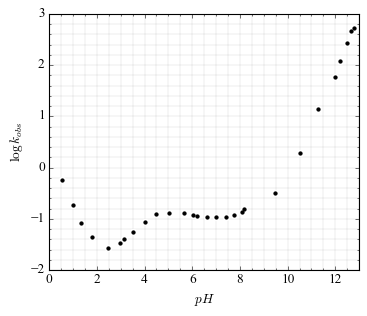

In [2]:
x = df.index
y = np.array(df["logk"])


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

#plt.style.use(github_styles_location + "tufte.mplstyle")        
plt.style.use(github_styles_location + "S2_classic2.mplstyle")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

########################
### Plot the data    ###
########################

ax.scatter(x,y, s=32, color="white", zorder=3)
ax.scatter(x,y, s=8, color="black", zorder=3)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=r"$pH$",
          xlim=[0,13],                  
          ylim=[-2,3]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

#fig.savefig("plot_pH.pdf")   # use this to save the figure in PDF format
plt.show()                   # output the combined plot plots


k^AH2_H2O = 1.8798475830057035
k^A-_HO- = 7970.651729488183
Ka, k^AH_H2O = [3.55095496 0.11874447]


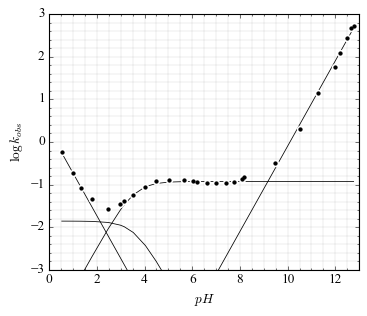

In [3]:
x = df.index
y = np.array(df["logk"])

line = True

def genbase(pH_list, pKa, kobs):
    Ka = 10**(-pKa)
    H_list = 10**(-pH_list)
    rate = Ka/(Ka + H_list)*kobs
    return np.log10(rate)

def genbase2(pH_list, kobs):
    Ka = 10**(-3.6)
    H_list = 10**(-pH_list)
    rate = (Ka/(Ka + H_list)*kobs)
    return np.log10(rate)

def genacid(pH_list, pKa, kobs):
    Ka = 10**(-pKa)
    H_list = 10**(-pH_list)
    rate = (H_list/(Ka + H_list)*kobs)
    return np.log10(rate)

def specificacid(pH_list, k):
    H_list = 10**(-pH_list)
    rate = (H_list*k)
    return np.log10(rate)    
    
def specificbase(pH_list, k):
    H_list = 10**(-pH_list)
    OH_list = (10**(-14)) / H_list
    rate = (OH_list*k)
    return np.log10(rate)    



##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

#plt.style.use(github_styles_location + "tufte.mplstyle")        
plt.style.use(github_styles_location + "S2_classic2.mplstyle")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  


def oneslope (x, int):
    return 1*x + int

def oneslopeneg (x, int):
    return -1*x + int

#########################################
### Plot the data and the line fit.   ###
#########################################

x1 = np.array(x[0:3])
y1 = np.array(y[0:3])

param, pcov = curve_fit(specificacid, x1, y1)
fity = specificacid(x, param[0])
#linfit = linregress(x1,y1)
#fity = linfit.slope * x + linfit.intercept
if line == True:
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)
print("k^AH2_H2O =",param[0])

x1 = np.array(x[20:28])
y1 = np.array(y[20:28])

param, pcov = curve_fit(specificbase, x1, y1)
fity = specificbase(x, param[0])
#linfit = linregress(x1,y1)
#fity = linfit.slope * x + linfit.intercept
if line == True:
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)
print("k^A-_HO- =",param[0])


x1 = np.array(x[7:18])
y1 = np.array(y[7:18])

param, pcov = curve_fit(genbase, x1, y1, bounds=([3.,0.1], [5., 0.2]))
print("Ka, k^AH_H2O =", param)
fity = genbase(x, param[0], param[1])
if line == True:
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)


y1 = genacid(x, 3.6, 0.014)
if line == True:
    ax.plot(x, y1, color='black', zorder=1, linewidth=0.7)


ax.scatter(x,y, s=32, color="white", zorder=3)
ax.scatter(x,y, s=8, color="black", zorder=3)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=r"$pH$",
          xlim=[0,13],                  
          ylim=[-3,3]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

#fig.savefig("plot_pH2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


ka = 1.75
kb = 0.01
kc = 0.12
kd = 7555.78
pKa = 3.65


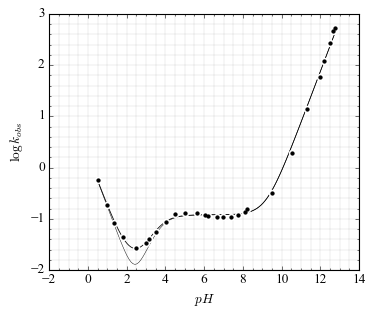

In [4]:
### The Big Curve Fit

def model(pH, ka = 1.88, kb=0.01, kc = 0.119, kd = 7970, Ka1 = 10**(-3.55)):    
    """
    model(x, ka, kb, kc, kd, Ka2, Ka1)
    pH is an array of pH values
    returns an array of log(k_obs) values
    """
    KW = 10**(-14)
    H = 10**(-pH)
    k_obs = (ka*(H) + kb + kc*(Ka1/H) + kd*(Ka1/H)*(KW/H))/(1 + (Ka1/H))
    return(np.log10(k_obs))

def model2(pH, kb=0.01):    
    """
    model(x, ka, kb, kc, kd, Ka2, Ka1)
    pH is an array of pH values
    returns an array of log(k_obs) values
    """
    ka = 1.88; kc = 0.119; kd = 7970; Ka1 = 10**(-3.55)
    KW = 10**(-14)
    H = 10**(-pH)
    k_obs = (ka*(H) + kb + kc*(Ka1/H) + kd*(Ka1/H)*(KW/H))/(1 + (Ka1/H))
    return(np.log10(k_obs))

                                                                
x = df.index
y = df["logk"]

#print(x,y)



[ka, kb, kc, kd, Ka1], pcov = curve_fit(model, x, y, bounds=([1.5, 0.0, .1, 7000, 10**(-4.)], [2, 1, .2, 8000, 10**(-3.)]))
#kb, pcov = curve_fit(model2, x, y, bounds=(0.0,0.02))

#print(ka, kb, kc, kd, -np.log10(Ka1))

print(f"ka = {ka:0.2f}")
print(f"kb = {kb:0.2f}")
print(f"kc = {kc:0.2f}")
print(f"kd = {kd:0.2f}")
print(f"pKa = {-np.log10(Ka1):0.2f}")


#print(kb)

step = 0.1
x1 = np.arange(np.min(x), np.max(x)+step, step)
y1 = model(x1, ka, kb, kc, kd, Ka1)
#y1 = model2(x1, kb)
y2 = model(x1, ka, 0, kc, kd, Ka1)

line = True


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

#plt.style.use(github_styles_location + "tufte.mplstyle")        
plt.style.use(github_styles_location + "S2_classic2.mplstyle")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the data and the line fit.   ###
#########################################

ax.plot(x1, y1, color='black', zorder=1, linewidth=0.7)
ax.plot(x1, y2, color='black', zorder=1, linewidth=0.4)

ax.scatter(x,y, s=32, color="white", zorder=3)
ax.scatter(x,y, s=8, color="black", zorder=3)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=r"$pH$",
#          xlim=[0,13],                  
          ylim=[-2,3]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

#fig.savefig("plot_pH3.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


    

# Buffer Rate Plot
The code below reads the data fro the buffer rate experiment in the paper and plots the result.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit


################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv(data_path + "EdwardsBufferData.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="conc", 
                 comment = "#") 

df["logk"] = np.log10(df["k_obs"])
df["logconc"] = np.log10(df.index)

df

,k_obs,logk,logconc
conc,,,
0.33300,0.112,-0.950782,-0.477556
0.16700,0.116,-0.935542,-0.777284
0.08330,0.114,-0.943095,-1.079355
0.04170,0.114,-0.943095,-1.379864
0.02090,0.119,-0.924453,-1.679854
0.01040,0.115,-0.939302,-1.982967
0.00521,0.119,-0.924453,-2.283162


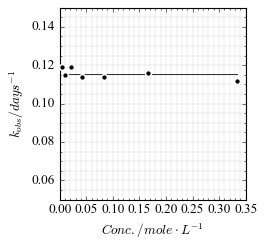

[[9.93197267e-07]] [0.11557143]


In [9]:
#x = df["logconc"]
#y = np.array(df["logk"])

x = df.index
y = df["k_obs"]


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

#plt.style.use(github_styles_location + "tufte.mplstyle")        
plt.style.use(github_styles_location + "S2_classic2.mplstyle")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  

#########################################
### Plot the data and the line fit.   ###
#########################################

def zeroslope (x, int):
    return int*x/x

param, pcov = curve_fit(zeroslope, x, y)

int = param[0]
fity = 0 * x + int
ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)
#print("slope =",linfit.slope)


ax.scatter(x,y, s=32, color="white", zorder=3)
ax.scatter(x,y, s=8, color="black", zorder=3)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"${k_{obs} /days^{-1}}$", 
       xlabel=r"${Conc. /mole\cdot L^{-1}}$",
           xlim=[0,0.35],                  
          ylim=[0.05,.15]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

#fig.savefig("plot_buffer.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

param, pcov = curve_fit(zeroslope, x, y)
perr = np.sqrt(np.diag(pcov))
print(pcov, param)